#  DEEPLEARNING IMAGES & TEXT

In [1]:
import glob
import pandas as pd
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html
#get current working directory
path = os.getcwd() + '\\images\\image_train'
path

'C:\\Users\\Edgar\\Documents\\Rakuten\\images\\image_train'

## TEXT

Données textuelles:

In [2]:
df_X = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\X_train\X_train_lemma-FR_stop_words-FR_no_num-FR_remove_accents-FR_no_special-FR_lemma-EN_stop_words-EN_stop_words-DE_lemma-DE_steem-FR_steem-EN_steem-DE.csv',index_col =0)
df_y = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\Y_train_CVw08PX.csv',index_col=0)

In [3]:
df_y['label'] = df_y['prdtypecode'].replace(df_y.prdtypecode.unique(), [*range(len(df_y.prdtypecode.unique()))])
df_y

,prdtypecode,label
0,10,0
1,2280,1
2,50,2
3,1280,3
4,2705,4
...,...,...
84911,40,18
84912,2583,12
84913,2280,1
84914,1560,7


Nombre de mots par texte:

In [4]:
df_X.rename(columns={'0':'text'},inplace=True)

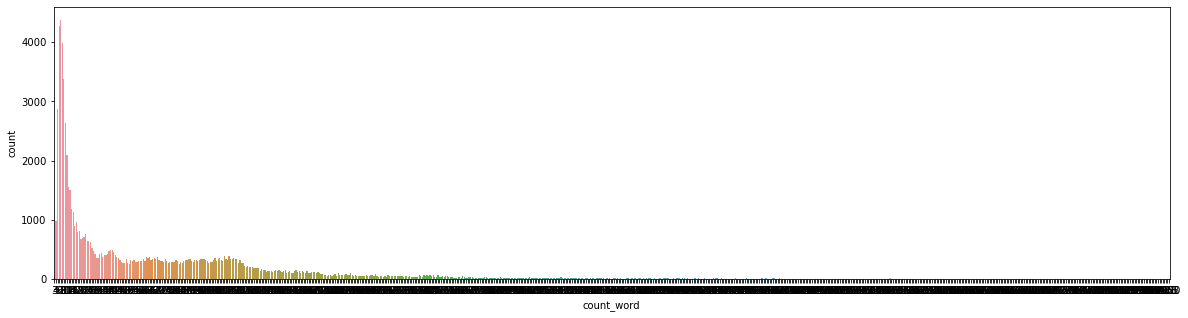

In [5]:
import seaborn as sns
from matplotlib import pyplot

df_X["count_word"] = df_X.text.apply(lambda x : len(x.split(' ')))

fig, ax = pyplot.subplots(figsize=(20,5))

sns.countplot(df_X["count_word"],ax=ax);

Pour éviter des séquences trop longues, le seuil maximum d'une phrase sera considéré à 40:

In [6]:
#df_X = df_X[df_X.count_word<=40]

#df_X["count_word"] = df_X.text.apply(lambda x : len(x.split(' ')))
#fig, ax = pyplot.subplots(figsize=(20,5))

#sns.countplot(df_X["count_word"],ax=ax)

Separer les données en train & text:

In [7]:
# Importer la classe train_test 
from sklearn.model_selection import train_test_split

# Séparer le jeu de données en données d'entraînement et données test 
X_train_text, X_test_text, y_train, y_test = train_test_split(df_X, df_y.prdtypecode,  train_size = 0.4, test_size=0.2,random_state=42)

X_train_text

,text,count_word
60735,cart postal typo aim kiub cart postal tendanc ...,38
9118,garcon jeu plateau avoir propo agit un jeu car...,61
55855,royaum anim ab asc nan,6
42138,piscin jeu adress x,5
10948,unit stat european union auditor indep regul nan,9
...,...,...
76233,piscin bou ballon gonflabl intex set complet p...,61
47141,pomp avoir chaleur pacfirst nov invert kw mono...,178
42108,robocop play art kai figurin robocop cm avoir ...,31
72085,urss avoir heur k nan,6


Tokeniser: texte -> sequence entier (index dans un dictionaire):

In [8]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train_text.text)

• Transformer chaque review X_text_train en une séquence d'entiers à l'aide de la méthode texts_to_sequences

In [9]:
X_train = tokenizer.texts_to_sequences(X_train_text.text)
X_test = tokenizer.texts_to_sequences(X_test_text.text)

Stocker le dictionnaire de correspondance:

In [10]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

• Transfomer la liste de sequence X_train en tableau numpy à l'aide de la fonction pad_sequences

In [11]:
maxlen = 500
X_train_txt = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test_txt = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [12]:
X_train_txt

array([[ 121, 2575,  634, ...,    0,    0,    0],
       [ 651,   32,  714, ...,    0,    0,    0],
       [2643,  194,  413, ...,    0,    0,    0],
       ...,
       [ 876,  340, 5968, ...,    0,    0,    0],
       [8793,   13,   35, ...,    0,    0,    0],
       [ 291,  478, 3552, ...,    0,    0,    0]])

## IMAGES

Recuperer les données images:

In [13]:
X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)

#Create a column with the name of the picture
X['image_name'] = 'image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
X['image_path'] = path + r'\image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
print(X['image_name'].loc[0])
print(X['image_path'].loc[0])

image_1263597046_product_3804725264.jpg
C:\Users\Edgar\Documents\Rakuten\images\image_train\image_1263597046_product_3804725264.jpg


Concatener X_train et les labels:

In [14]:
X = pd.concat([X,y],axis=1)
X

,designation,description,productid,imageid,image_name,image_path,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,image_1263597046_product_3804725264.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,image_1008141237_product_436067568.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,image_938777978_product_201115110.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,image_457047496_product_50418756.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,image_1077757786_product_278535884.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2705
...,...,...,...,...,...,...,...
84911,The Sims [ Import Anglais ],NaN,206719094,941495734,image_941495734_product_206719094.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,40
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,image_1188462883_product_3065095706.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2583
84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,image_1009325617_product_440707564.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2280
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,image_1267353403_product_3942400296.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,1560


Une fois nous avons un dataset de la taille desirée on peut le séparer en train et test sets:

In [15]:
X_train_img, X_test_img, y_train, y_test = train_test_split(X[['image_name','prdtypecode']], X.prdtypecode, train_size = 0.4 ,test_size=0.2, random_state=42)
#X_train_path, X_test_path, y_train, y_test = train_test_split(X.image_path, X.label, random_state=42)

In [16]:
X_train_img

,image_name,prdtypecode
60735,image_1208783386_product_2825941333.jpg,1320
9118,image_856119038_product_89102802.jpg,1281
55855,image_936925976_product_197015072.jpg,2403
42138,image_1166755995_product_2824252365.jpg,1302
10948,image_1017775450_product_418466190.jpg,10
...,...,...
76233,image_1075701044_product_1351876762.jpg,2583
47141,image_1174586088_product_2940638611.jpg,2583
42108,image_984906419_product_290034883.jpg,1140
72085,image_901400003_product_62981761.jpg,10


Generation des données:

In [18]:
#APPLY SOME TRANSFORMATIONS TO DATA


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

image_train_set = train_datagen.flow_from_dataframe(dataframe=X_train_img,
                                              directory=path,
                                              x_col = "image_name",
                                              y_col = "prdtypecode",
                                              class_mode ="sparse",
                                              target_size = (224, 224),
                                              batch_size = 32)

image_test_set = test_datagen.flow_from_dataframe(dataframe=X_test_img,
                                              directory=path,
                                              x_col = "image_name",
                                              y_col = "prdtypecode",
                                              class_mode ="sparse",
                                              target_size = (224, 224),
                                              batch_size = 32)

Found 33966 validated image filenames belonging to 27 classes.
Found 16984 validated image filenames belonging to 27 classes.


In [48]:
# Dataset de notre jeu de données
text_train_set = tf.data.Dataset.from_tensor_slices((X_train_txt, y_train.values))

text_test_set = tf.data.Dataset.from_tensor_slices((X_test_txt, y_test.values))

In [49]:
# Ajouter la fonction load_image dans le pipeline des opérations. Séparer le résultat en lot de taille 32.
text_train_set = text_train_set.map(lambda text, y: [text, y]).batch(32).repeat(-1)
#dataset = dataset.map(lambda x, y: [load_image(x), y[:-1], y[1:]]).batch(16).repeat(-1)

text_test_set = text_test_set.map(lambda text, y: [text, y]).batch(32).repeat(-1)

In [54]:
# Définition d'un générateur python
def generator(image_set,text_set):
    iter_text = iter(text_set)
    iter_image = iter(image_set)
    while True:
        X_text, y_text = next(iter_text) #do not use this 'y_text' from text iterator!!! Tf does not recognise it and leads to bug during training
        X_im, y = next(iter_image)
        
        #print('')
        #print('X_im:',X_im.shape,'X_text:',X_text.shape,'y:',y.shape)
        #print(y)
        yield [X_im, X_text], y

In [55]:
# Définition du générateur final.
gen_train = generator(image_train_set,text_train_set)

gen_test = generator(image_test_set,text_test_set)

### MODELE POUR CLASSIFICATION DE TEXTE

In [56]:
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling2D, RNN, GRUCell, Dense,LSTM

embedding_dim = 256
voc_size_inp = len(tokenizer.word_counts)+1

text_inputs = Input(shape=(None,), dtype='int32')
embed = Embedding(voc_size_inp, embedding_dim)(text_inputs)
gru = LSTM(512)(embed)
#text_output = Dense(27, activation='softmax')(gru)

### MODELE POUR CLASSIFICATION D'IMAGE

In [57]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout

base_model = VGG16(weights='imagenet',input_shape=(224, 224, 3),include_top=False)

image_input = Input(shape=(224, 224, 3), name='image')
x = base_model(image_input)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
images = Dropout(0.2)(x)
#x = Flatten()(x) 

### CONCATENATE

In [63]:
#https://towardsdatascience.com/deep-multi-input-models-transfer-learning-for-image-and-word-tag-recognition-7ae0462253dc

from tensorflow.keras.layers import concatenate
from tensorflow.keras import Model

x = concatenate([images, gru], axis=-1)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(27, activation='softmax')(x)

model = Model([image_input, text_inputs], output)

unfreezed_layers = 0 #Nombre de couches a décongeler pour aplique le finetuning: Voir livre Deep Learning with python
# Freezer les couches du VGG16
for layer in base_model.layers[-unfreezed_layers:]: 
    layer.trainable = False
    
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 7, 7, 512)    14714688    image[0][0]                      
__________________________________________________________________________________________________
global_average_pooling2d_2 (Glo (None, 512)          0           vgg16[0][0]                      
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 1024)         525312      global_average_pooling2d_2[0][0] 
____________________________________________________________________________________________

In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Callbacks:

In [65]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                         mode='min',
                                         restore_best_weights=True)

import os
cwd = os.getcwd()
filepath = cwd + '/out'

checkpoint = callbacks.ModelCheckpoint(filepath=filepath + '/concat_RNN_VGG16.hdf5', 
                                       monitor='val_loss',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='min',
                                       save_freq='epoch')

In [66]:
#model.fit_generator(gen, steps_per_epoch=int(len(y_train.values)/16), validation_data = gentest, validation_steps = int(len(y_test.values)/16),epochs=10, workers=-1,callbacks=[early_stopping, checkpoint])
model.fit(gen_train, steps_per_epoch=int(len(y_train.values)/32), validation_data = gen_test, validation_steps = int(len(y_test.values)/32),epochs=10, workers=1)


#https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/
#So, we have learned the difference between Keras.fit and Keras.fit_generator functions used to train a deep learning neural network
#.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
#.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

X_im: (32, 224, 224, 3) X_text: (32, 500) y: (32,)
[13.  4. 10. 25.  4.  1. 20. 10. 10. 18. 24. 11.  4. 18. 20. 11. 20. 10.
 17.  0. 26. 18. 24.  0. 18.  0. 25.  9. 15. 15. 20. 11.]
Epoch 1/10
X_im: (32, 224, 224, 3) X_text: (32, 500) y: (32,)
[ 5. 15. 23. 20. 13. 13. 16.  3. 22.  2. 10.  9.  1. 11. 22. 18.  6. 20.
  9. 11.  9. 14. 17.  5. 16. 13. 19. 11. 20.  2. 20. 13.]
   1/1061 [..............................] - ETA: 3:09:09 - loss: 3.2603 - accuracy: 0.0625X_im: (32, 224, 224, 3) X_text: (32, 500) y: (32,)
[15.  8. 22. 20. 17. 20. 20. 10. 10. 25. 17. 13.  1. 16. 10.  6.  2. 21.
  0.  6. 16.  0. 18.  7.  0. 16. 22. 20. 23. 11. 13. 24.]
   2/1061 [..............................] - ETA: 2:28:55 - loss: 3.3050 - accuracy: 0.0938X_im: (32, 224, 224, 3) X_text: (32, 500) y: (32,)
[ 5.  4. 21. 20. 13. 16. 15. 19. 25. 19. 10.  2. 16.  9. 10. 22.  6. 11.
 11. 13. 20.  2. 24.  6. 10.  9. 20. 20. 20. 20. 20.  9.]
   3/1061 [..............................] - ETA: 2:28:17 - loss: 3.2978 - accu

KeyboardInterrupt: 

Tokeniser: texte -> sequence entier (index dans un dictionaire):

In [ ]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train_text.text)

• Transformer chaque review X_text_train en une séquence d'entiers à l'aide de la méthode texts_to_sequences

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train_text.text)
X_test = tokenizer.texts_to_sequences(X_test_text.text)

Stocker le dictionnaire de correspondance:

In [ ]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

• Transfomer la liste de sequence X_train en tableau numpy à l'aide de la fonction pad_sequences

In [ ]:
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [ ]:
X_train